In [1]:
from model import *
from train_test_split import *
from predictionsGraph import *
from data_set import *
from torch.utils.data import DataLoader

In [2]:
seq_len = 3 #ovdje treba biti ista vrijednost kao kad se treniralo
batch_size = 1 #ovdje treba biti ista vrijednost kao kad se treniralo
train_data, val_data, test_data = load_data('real_for_all_podaci.csv') 
input_dim = train_data.shape[1]
test_dataset = Dataset(test_data, seq_len)
test_loader = DataLoader(test_dataset, shuffle=True, batch_size=batch_size)
model = Net(input_dim,  hidden_dim = 10, drop_prob = 0)

In [13]:
path_to_model = 'models/epoch_199-batch_size_1-lr_1e-06.weights'
model.load_state_dict(torch.load(path_to_model))
model.eval()

Net(
  (lstm): LSTM(7, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
  (dropout): Dropout(p=0, inplace=False)
)

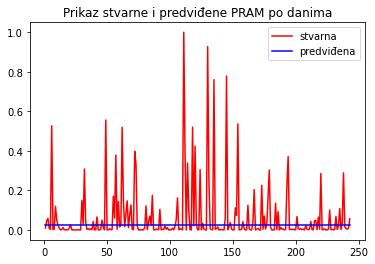

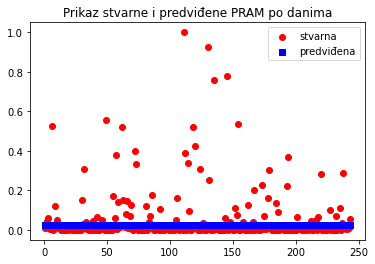

In [15]:
realValues = []
predictedValues = []
h = model.lstm.weight_ih_l0
for (inputs, labels) in test_loader:
    inputs, labels = inputs, labels 
    output = model(inputs, h)
    realValues.append(labels.item())
    predictedValues.append(output.item())
    
predictionsGraph(realValues, predictedValues)
predictionsGraphScatter(realValues, predictedValues)